# Assignment 2: Data Cleaning and Visualization
## Author: Jerry Hong

In [1]:
# Find working directory
import os
path = os.getcwd()
print(path)

C:\Users\jerry\OneDrive - Emory University\AtlantaJunior\Fall 2022\ECON 220\Lab\Homework


In [3]:
# Import necessary packages: pandas and seaborn
import pandas as pd
import seaborn as sns
# Remove scientific notations: after seeing baby.describe()
pd.options.display.float_format = '{:.4f}'.format
# Remove unncessary warnings from Pandas on this particular assignment
pd.options.mode.chained_assignment = None  # default='warn'

## Import Data Set
- Import the data set "StudentSurvey.csv" from Canvas and call this object "data"

In [4]:
data = pd.read_csv(r"C:\Users\jerry\OneDrive - Emory University\AtlantaJunior\Fall 2022\ECON 220\Lab\Data\StudentSurvey.csv")

## Data Cleaning and Summary Statistics 
- Create a new object **survey** by selecting/filtering the variables that you see below.

 * age
 * sex
 * q29 -> Sleep
 * q58  -> Expected salary after graduation

- Check the information of the data selection to see the types of the variables
- Clean the variables 
- Show the summary statistics of the variables

In [5]:
 # Select variables 
survey = data[['age', 'sex','q29', 'q58']]


# Check the info of the data selection 
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     100 non-null    object
 1   sex     101 non-null    object
 2   q29     100 non-null    object
 3   q58     100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


### Data Cleaning 
See in the code cell what variables you have to clean. 

In [6]:
# Clean "age"
survey['age'] = survey['age'].str.strip()
survey['age'] = survey['age'].replace('18  y', '18')
survey['age'] = survey['age'].replace('19 years old.', '19')

survey['age'].value_counts(dropna=False)

20     38
19     26
21     23
18      5
22      4
23      3
24      1
NaN     1
Name: age, dtype: int64

In [8]:
# Convert "age" from string to float
survey['age'] = survey['age'].astype('float')
survey['age'].dtypes

dtype('float64')

In [9]:
# Convert "sex" into a categorical variable
survey['sex'] = survey['sex'].astype('category')
survey['sex'].dtypes

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [11]:
# Clean "q29" (Sleep) by dropping strange observations
# Refer to both the notes and Announcements on Canvas on how to do this
strange = survey[survey['q29']== '10-Jun']
survey = survey.drop(strange.index)
survey['q29'].value_counts(dropna=False)

7      40
6      24
8      21
5       5
9       4
4       1
10      1
6.5     1
7.5     1
8.5     1
NaN     1
Name: q29, dtype: int64

In [12]:
# Convert "q29" from string to float
survey['q29'] = survey['q29'].astype('float')
survey['q29'].dtypes

dtype('float64')

In [14]:
# Clean "q58" (Expected Salary)
# Hint: remove potential spaces
survey['q58'] = survey['q58'].str.strip()
# Keep cleaning "q58"
survey['q58'] = survey['q58'].replace(',', '', regex=True)
survey['q58'] = survey['q58'].replace(' ', '', regex=True)
strange1 = survey[survey['q58']=='NOIDEA']
survey = survey.drop(strange1.index)
strange2 = survey[survey['q58']=='-']
survey = survey.drop(strange2.index)
survey['q58'].value_counts(dropna=False)

50000     15
70000     12
100000    12
75000      9
60000      7
0          5
80000      4
20000      4
30000      3
120000     3
90000      3
85000      2
40000      2
10000      2
150000     2
22000      1
18000      1
140000     1
110000     1
NaN        1
57000      1
56000      1
77500      1
130000     1
77255      1
8000       1
65000      1
7000       1
Name: q58, dtype: int64

In [15]:
# Convert "q58" from string to float
survey['q58']= survey['q58'].astype('float')
survey['q58'].dtypes

dtype('float64')

## Adding Variables
Create a few new variables using the Pandas package and incorporate them into your dataframe. 
- "Goodsleep" variable to indicate if a person sleeps more than 6 hours
- "Over21" variable to indicate if a person is 21 or older

In [16]:
# Fill in the conditions for the new variables
survey["Goodsleep"] = survey['q29'] > 6
survey["Over21"] = survey['age'] >= 21

## Summary Statistics
Provide summary statatistics (mean, standard deviation, min, max, count) for "age", "q29", "q58", "Goodsleep", and "Over21"

In [17]:
# Use the function .agg() to do this
# Hint: use 'std' for standard deviation
survey[['age','q29', 'q58', 'Goodsleep', 'Over21']].agg(['mean', 'std', 'min','max','count'])


,age,q29,q58,Goodsleep,Over21
mean,20.0619,6.9742,65389.2268,0.6939,0.2959
std,1.1440,1.0241,33809.0132,0.4633,0.4588
min,18.0000,4.0000,0.0000,False,False
max,24.0000,10.0000,150000.0000,True,True
count,97.0000,97.0000,97.0000,98,98


## Statistics by Group
Now let's look at statistics by sex

In [19]:
# Use the .groupby() and .agg() method to split the sample by sex
# and provide the mean for "q29" (Sleep) and "q58" (Expected Salary)
survey.groupby('sex')[['q29', 'q58']].agg('mean')


,q29,q58
sex,,
Female,6.8293,58304.8780
Male,7.0804,70575.9821


# Graph Using Seaborn                
- Create a scatter plot of "age" on the x-axis and "q29" (Sleep) on the y-axis  differentianting by sex. 
- Add title and labels to your plot

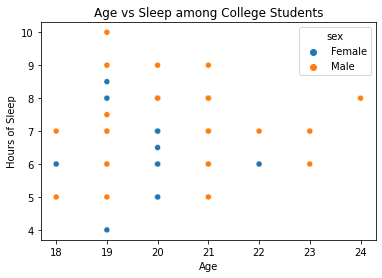

In [20]:
# Graph here
scatter = sns.scatterplot(data=survey, x='age', y='q29', hue='sex');
scatter.set(title='Age vs Sleep among College Students', xlabel='Age', ylabel='Hours of Sleep');


In [1]:
!jupyter nbconvert --to html Assignment_2.ipynb

[NbConvertApp] Converting notebook Assignment_2.ipynb to html
[NbConvertApp] Writing 606069 bytes to Assignment_2.html
